##Step 1: Understand the Problem and Data

Concrete is the most widely used construction material globally, and its compressive strength is a critical indicator of structural durability and load-bearing capacity. Understanding the factors that influence concrete strength—such as cement composition, water-cement ratio, aggregate properties, and curing time—is essential for engineers and architects to design safer, more cost-effective structures.


This analysis utilizes a dataset from Kaggle (e.g., Concrete Compressive Strength) containing key variables like:

* Cement content (kg/m³)

* Blast furnace slag, Fly ash (supplementary materials)

* Water, Superplasticizer (workability agents)

* Coarse/Fine aggregate ratios

* Curing age (days)

* Target: Compressive strength (MPa, megapascals)

The primary objective is to develop a linear regression model that predicts compressive strength based on these input features. By quantifying the relationship between mix proportions and strength, this project aims to:

1. Identify the most influential factors in concrete performance.

2. Provide actionable insights for optimizing material usage.

3. Establish a baseline predictive model for further refinement (e.g., with regularization or nonlinear techniques).

This report follows a structured approach: data preprocessing, exploratory analysis, linear regression modeling, and validation, with emphasis on interpreting coefficients and evaluating practical implications for the construction industry.

## Step 2: Load and Explore the Data

In [1]:
# Importing Necessary Libraries
import numpy as np # Numerical Computations
import pandas as pd # Data Manipulation
import seaborn as sns # Statistical Graphics
import matplotlib.pyplot as plt  # Plotting

In [2]:
df = pd.read_csv('concrete_data.csv') # Reading the data from the CSV file named '50_Startups.csv' and stores it in a pandas DataFrame named df.

In [3]:
df.head() # Displays the first 5 rows of the DataFrame df, allowing you to quickly inspect the data.

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info() # Prints a concise summary of the DataFrame df, including data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe() # Generates descriptive statistics of the DataFrame's numerical columns, like mean, standard deviation, and quartiles.

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum() # Calculates and displays the number of missing (null) values in each column of the DataFrame df.

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
df.duplicated().sum() # Returns a boolean Series indicating whether each row in the DataFrame df is a duplicate of a previous row.

np.int64(25)

In [8]:
df = df.drop_duplicates() # Removes duplicate rows from the DataFrame df and updates df with the result.

In [9]:
df.duplicated().sum()

np.int64(0)

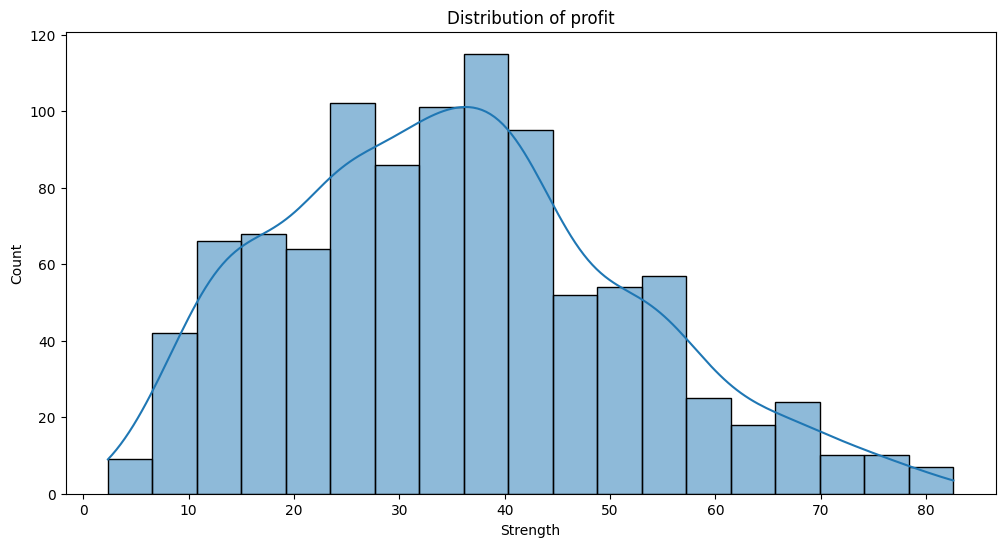

In [10]:
# Visualize Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['Strength'], kde=True)
plt.title('Distribution of profit')
plt.show()

The histogram shows the distribution of concrete strength. Most of the concrete samples have a strength between 30 and 40 MPa (which is like the average strength). There are some samples with much higher strength, but they are less common. Overall, the strength values are spread out, but not too extremely.

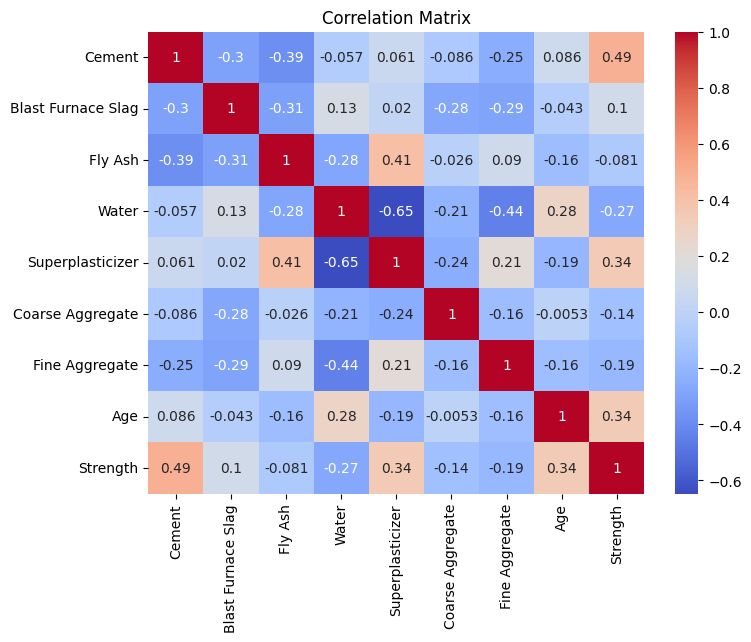

In [11]:
# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows how strongly different factors in concrete are related to each other.

* Darker red colors indicate a strong positive relationship. This means as one factor increases, the other tends to increase as well. For example, Cement and Strength have a dark red color suggesting that as the amount of cement increases, the strength of the concrete also tends to increase.

* Darker blue colors indicate a strong negative relationship. This means as one factor increases, the other tends to decrease. For example, Water and Strength have a dark blue color, indicating that more water in the mix generally leads to lower concrete strength.
Lighter colors (close to white) suggest a weak or no relationship between the factors.

* Cement content has a strong positive correlation with strength.
* Water content has a strong negative correlation with strength.
* Age has a moderate positive correlation with strength.
* Superplasticizer has a weak positive correlation with strength.
* Other factors show varying degrees of correlation with strength

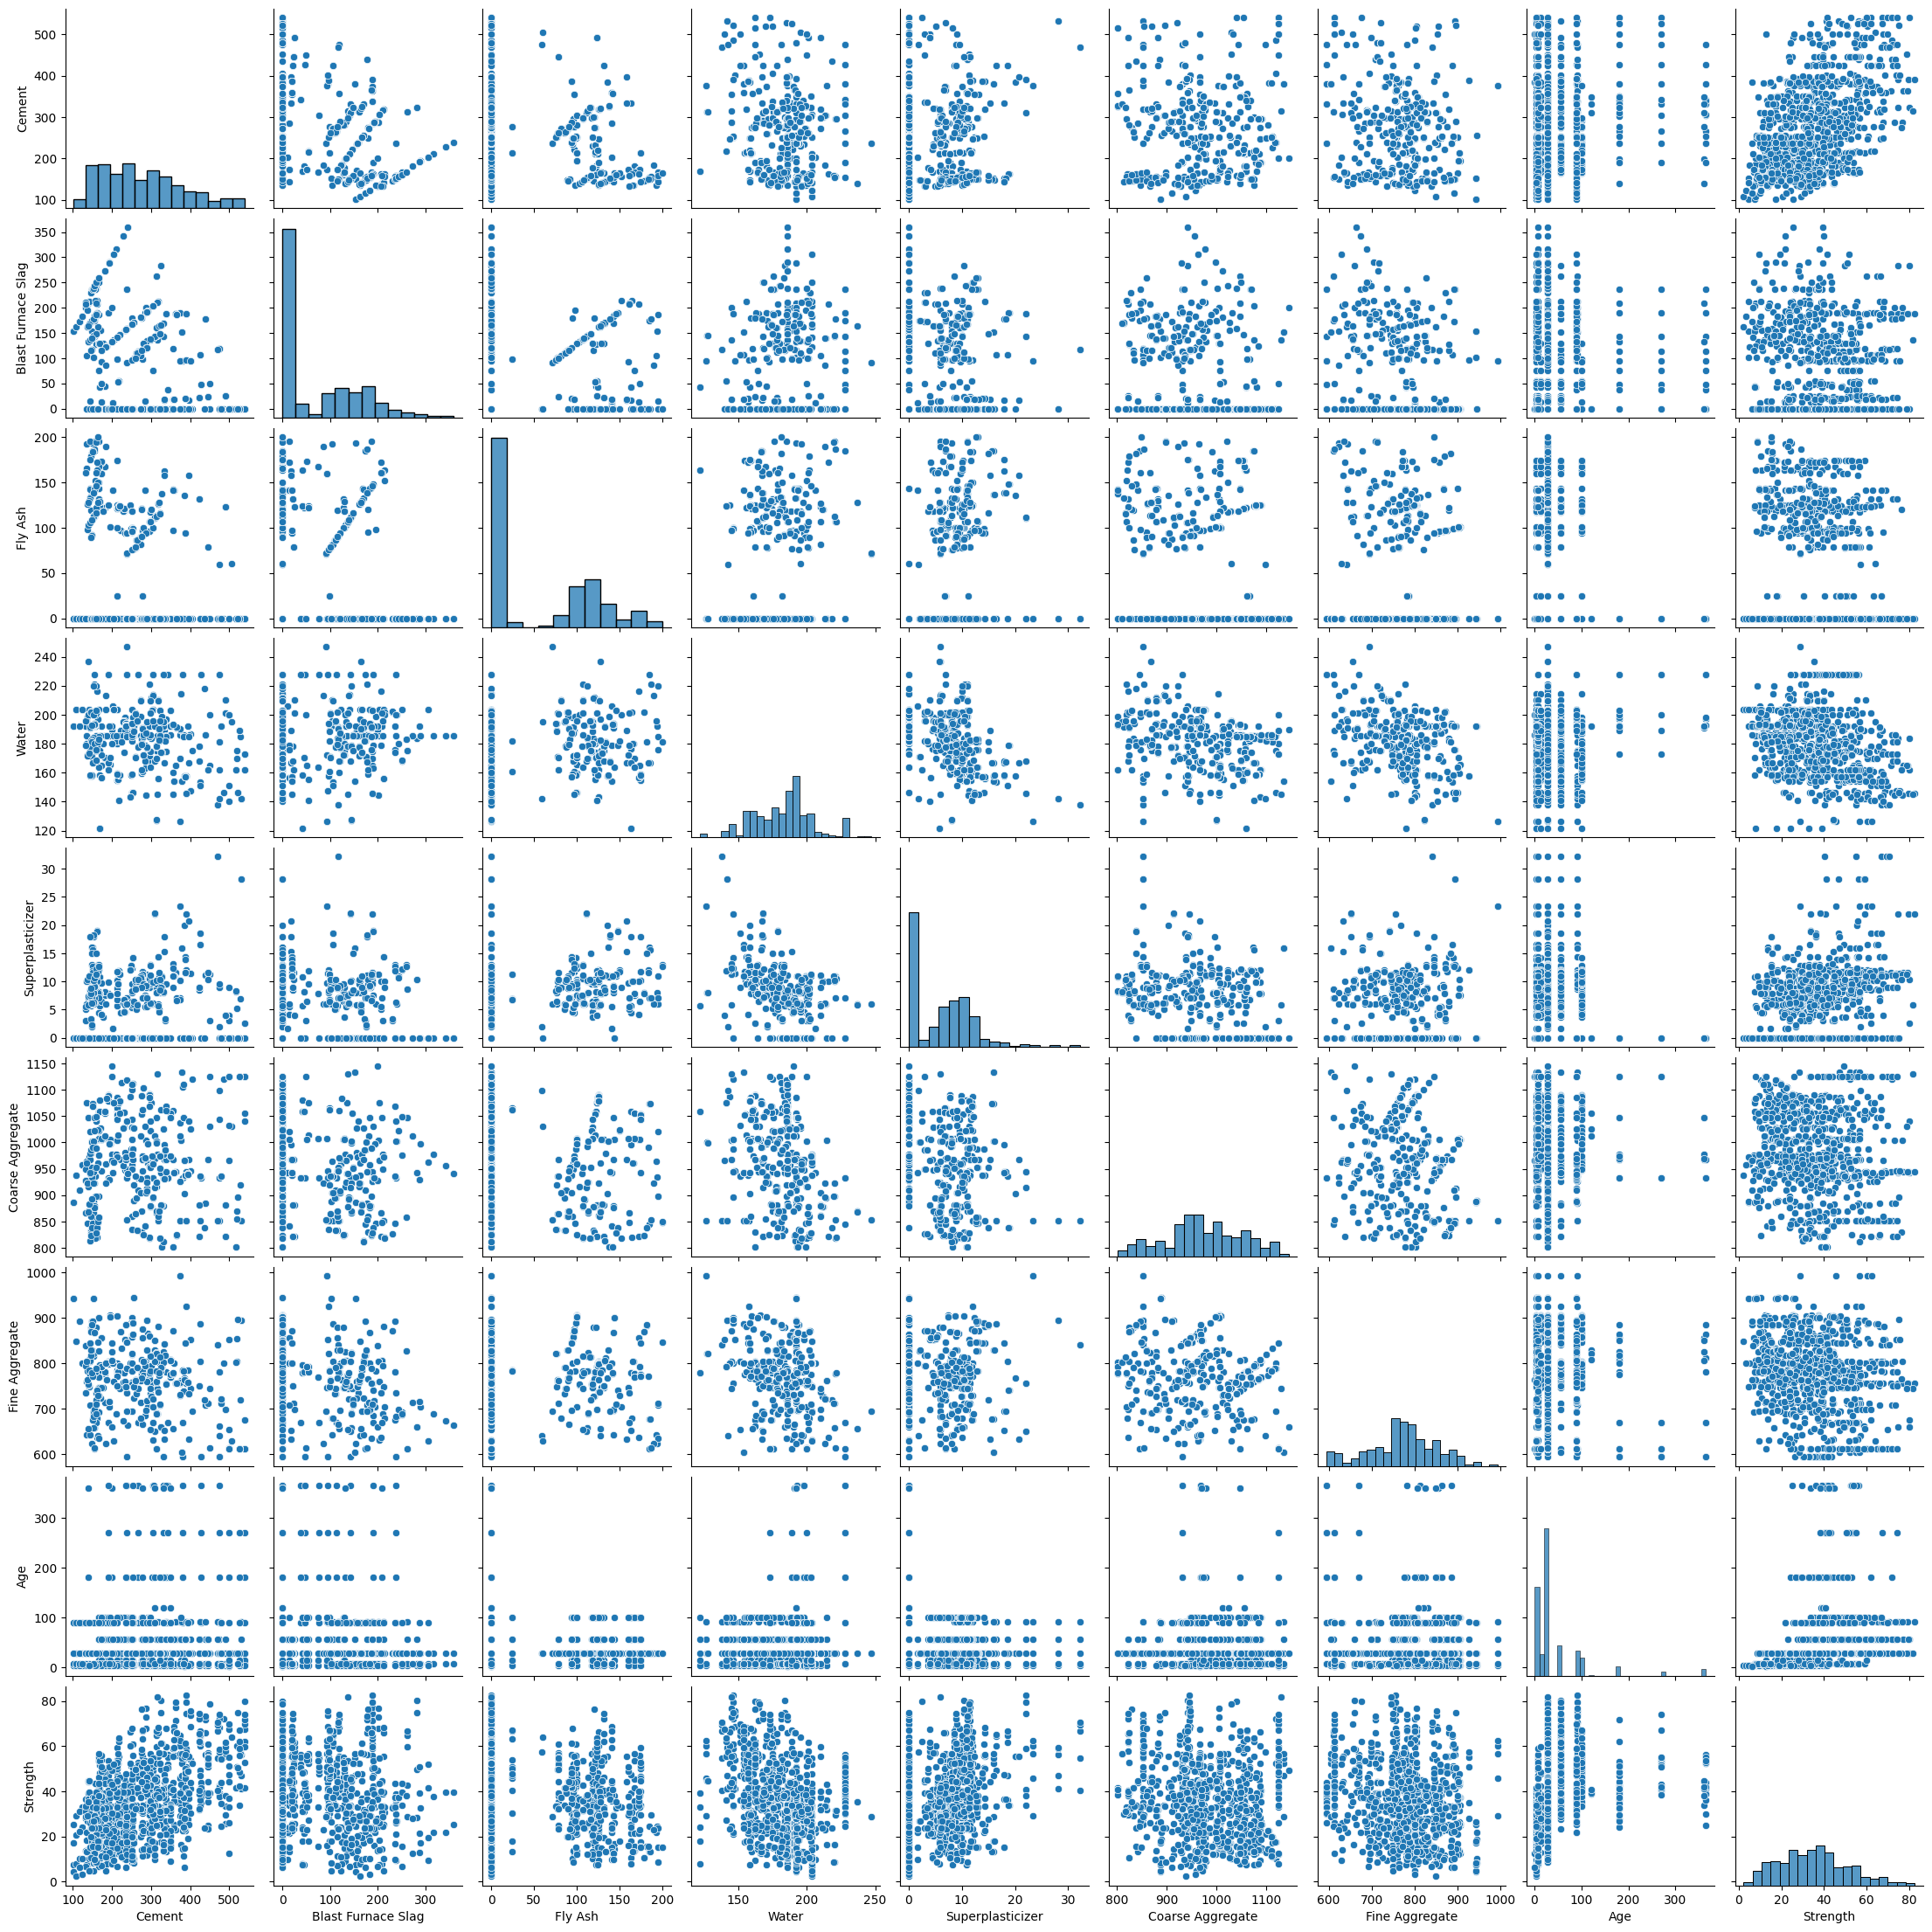

In [12]:
# Pair Plot for Numeric Variables
sns.pairplot(df[['Cement', 'Blast Furnace Slag', 'Fly Ash',	'Water',	'Superplasticizer',	'Coarse Aggregate',	'Fine Aggregate',	'Age',	'Strength']])
plt.show()

In [13]:
#creating interaction term
df['Cement_Water_Interaction'] = df['Cement'] * df['Water']

#  creating polynomial feature
df['Age_Squared'] = df['Age'] **2

# Step 5: Prepare Data for Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Defining feature and target
X = df.drop('Strength', axis=1)
y = df['Strength']

In [16]:
# Split the data
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [17]:
# Scale numberical features
scaler = StandardScaler()
cols = ['Cement', 'Blast Furnace Slag', 'Fly Ash',	'Water',	'Superplasticizer',	'Coarse Aggregate',	'Fine Aggregate',	'Age']
x_train[cols] = scaler.fit_transform(x_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

##Step 6: Build and Train the Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
# Initilize and train model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
# Making Predictions
y_pred = lr.predict(X_test)

In [21]:
# calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Erro:{mae:.2f}")
print(f"R-Squared:{r2:.2f}")

Mean Squared Error: 81.79
Root Mean Squared Error: 9.04
Mean Absolute Erro:6.88
R-Squared:0.64


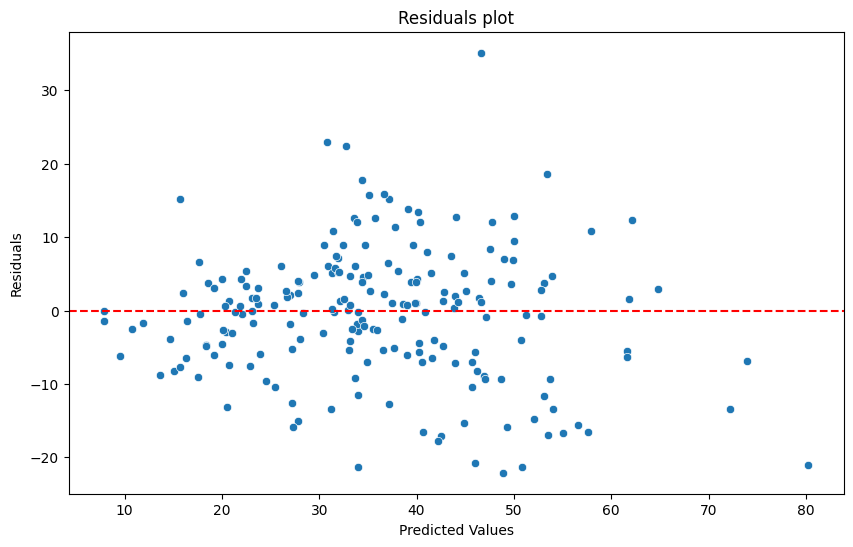

In [22]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()

Randomly scattered points: If the points in the residual plot are randomly scattered around the horizontal line, it suggests that our model is doing a good job of capturing the underlying patterns in the data and that there are no obvious systematic errors.